In [3]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack

import seaborn as sns

from pandas import read_csv
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn import metrics as sklearn_metrics
from sklearn.metrics import classification_report

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, LSTM, Dense, Flatten, TimeDistributed

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from keras.layers import Permute, Reshape
Directory = '/content/drive/MyDrive/Colab Notebooks/Ass6/3- HAR_Code/'

**DATA EXPLORATION**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
features = list()

# Open the 'UCI HAR Dataset/features.txt' file and read the feature names
with open(Directory + 'UCI HAR Dataset/features.txt') as feat:
    features = [l.split()[1] for l in feat.readlines()]

# Print the total number of features
print("Number of features = {}".format(len(features)))

# Print the feature names in a single line separated by '|'
for f in features:
    print(f, end=" | ")

Number of features = 561
tBodyAcc-mean()-X | tBodyAcc-mean()-Y | tBodyAcc-mean()-Z | tBodyAcc-std()-X | tBodyAcc-std()-Y | tBodyAcc-std()-Z | tBodyAcc-mad()-X | tBodyAcc-mad()-Y | tBodyAcc-mad()-Z | tBodyAcc-max()-X | tBodyAcc-max()-Y | tBodyAcc-max()-Z | tBodyAcc-min()-X | tBodyAcc-min()-Y | tBodyAcc-min()-Z | tBodyAcc-sma() | tBodyAcc-energy()-X | tBodyAcc-energy()-Y | tBodyAcc-energy()-Z | tBodyAcc-iqr()-X | tBodyAcc-iqr()-Y | tBodyAcc-iqr()-Z | tBodyAcc-entropy()-X | tBodyAcc-entropy()-Y | tBodyAcc-entropy()-Z | tBodyAcc-arCoeff()-X,1 | tBodyAcc-arCoeff()-X,2 | tBodyAcc-arCoeff()-X,3 | tBodyAcc-arCoeff()-X,4 | tBodyAcc-arCoeff()-Y,1 | tBodyAcc-arCoeff()-Y,2 | tBodyAcc-arCoeff()-Y,3 | tBodyAcc-arCoeff()-Y,4 | tBodyAcc-arCoeff()-Z,1 | tBodyAcc-arCoeff()-Z,2 | tBodyAcc-arCoeff()-Z,3 | tBodyAcc-arCoeff()-Z,4 | tBodyAcc-correlation()-X,Y | tBodyAcc-correlation()-X,Z | tBodyAcc-correlation()-Y,Z | tGravityAcc-mean()-X | tGravityAcc-mean()-Y | tGravityAcc-mean()-Z | tGravityAcc-std()-X | 

**Exploring Train Data**

In [6]:
# Read the features from the 'UCI HAR Dataset/test' folder
test = pd.DataFrame()

# Read the 'subject' data from 'UCI HAR Dataset/train/subject_test.txt' file and add it as a new column
test['subject'] = pd.read_csv(Directory + 'UCI HAR Dataset/test/subject_test.txt', header=None).squeeze('columns')

# Read the 'Activity' data from 'UCI HAR Dataset/train/y_test.txt' file and add it as a new column
test['Activity'] = pd.read_csv(Directory + 'UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze('columns')

# Map the numerical activity codes to their corresponding names and add a new column
test['ActivityName'] = test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Display 5 random sample row from the DataFrame
test.sample(5)

,subject,Activity,ActivityName
1164,10,3,WALKING_DOWNSTAIRS
332,4,4,SITTING
177,2,5,STANDING
1623,13,1,WALKING
1803,13,1,WALKING


In [7]:
# Read the features from the 'UCI HAR Dataset/train' folder
train = pd.DataFrame()

# Read the 'subject' data from 'UCI HAR Dataset/train/subject_train.txt' file and add it as a new column
train['subject'] = pd.read_csv(Directory + 'UCI HAR Dataset/train/subject_train.txt', header=None).squeeze('columns')

# Read the 'Activity' data from 'UCI HAR Dataset/train/y_train.txt' file and add it as a new column
train['Activity'] = pd.read_csv(Directory + 'UCI HAR Dataset/train/y_train.txt', names=['Activity']).squeeze('columns')

# Map the numerical activity codes to their corresponding names and add a new column
train['ActivityName'] = train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS', 3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING', 6:'LAYING'})

# Display 5 random sample row from the DataFrame
train.sample(5)


,subject,Activity,ActivityName
5278,25,5,STANDING
1691,8,6,LAYING
723,5,4,SITTING
1620,7,2,WALKING_UPSTAIRS
6722,29,6,LAYING


**Checking for Duplicates and Nulls**

In [8]:
# Checking for duplicates in the train dataset
print('Duplicates in train = {}'.format(sum(train.duplicated())))

# Checking for duplicates in the test dataset
print('Duplicates in test = {}'.format(sum(test.duplicated())))

# Checking for invalid (null) values in the train dataset
print('Invalid values in train = {}'.format(train.isnull().values.sum()))

# Checking for invalid (null) values in the test dataset
print('Invalid values in test = {}'.format(test.isnull().values.sum()))

Duplicates in train = 7226
Duplicates in test = 2893
Invalid values in train = 0
Invalid values in test = 0


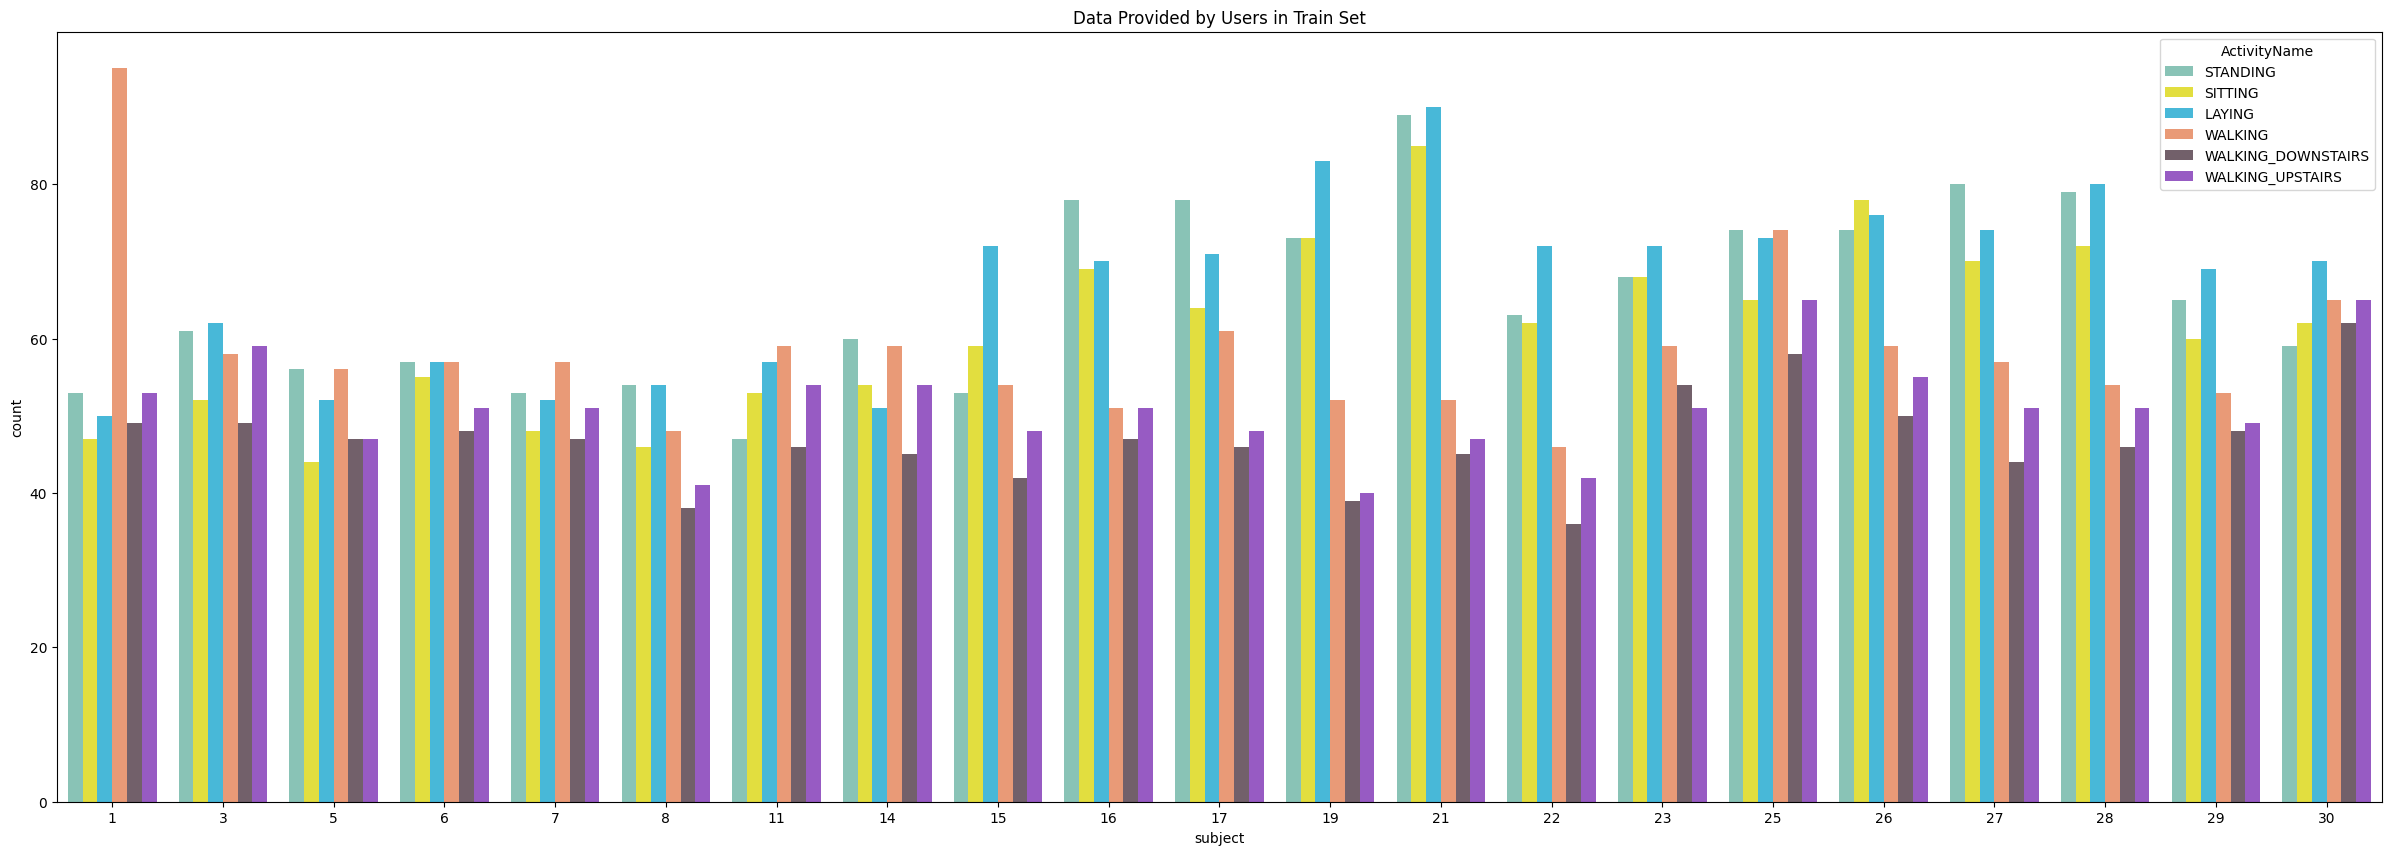

In [9]:
 # Setting the figure size
pyplot.figure(figsize=(30, 10))

# Creating a count plot
sns.countplot(x='subject', hue='ActivityName', palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"], data=train)

# Adding a title to the plot
pyplot.title('Data Provided by Users in Train Set')

# Displaying the plot
pyplot.show()


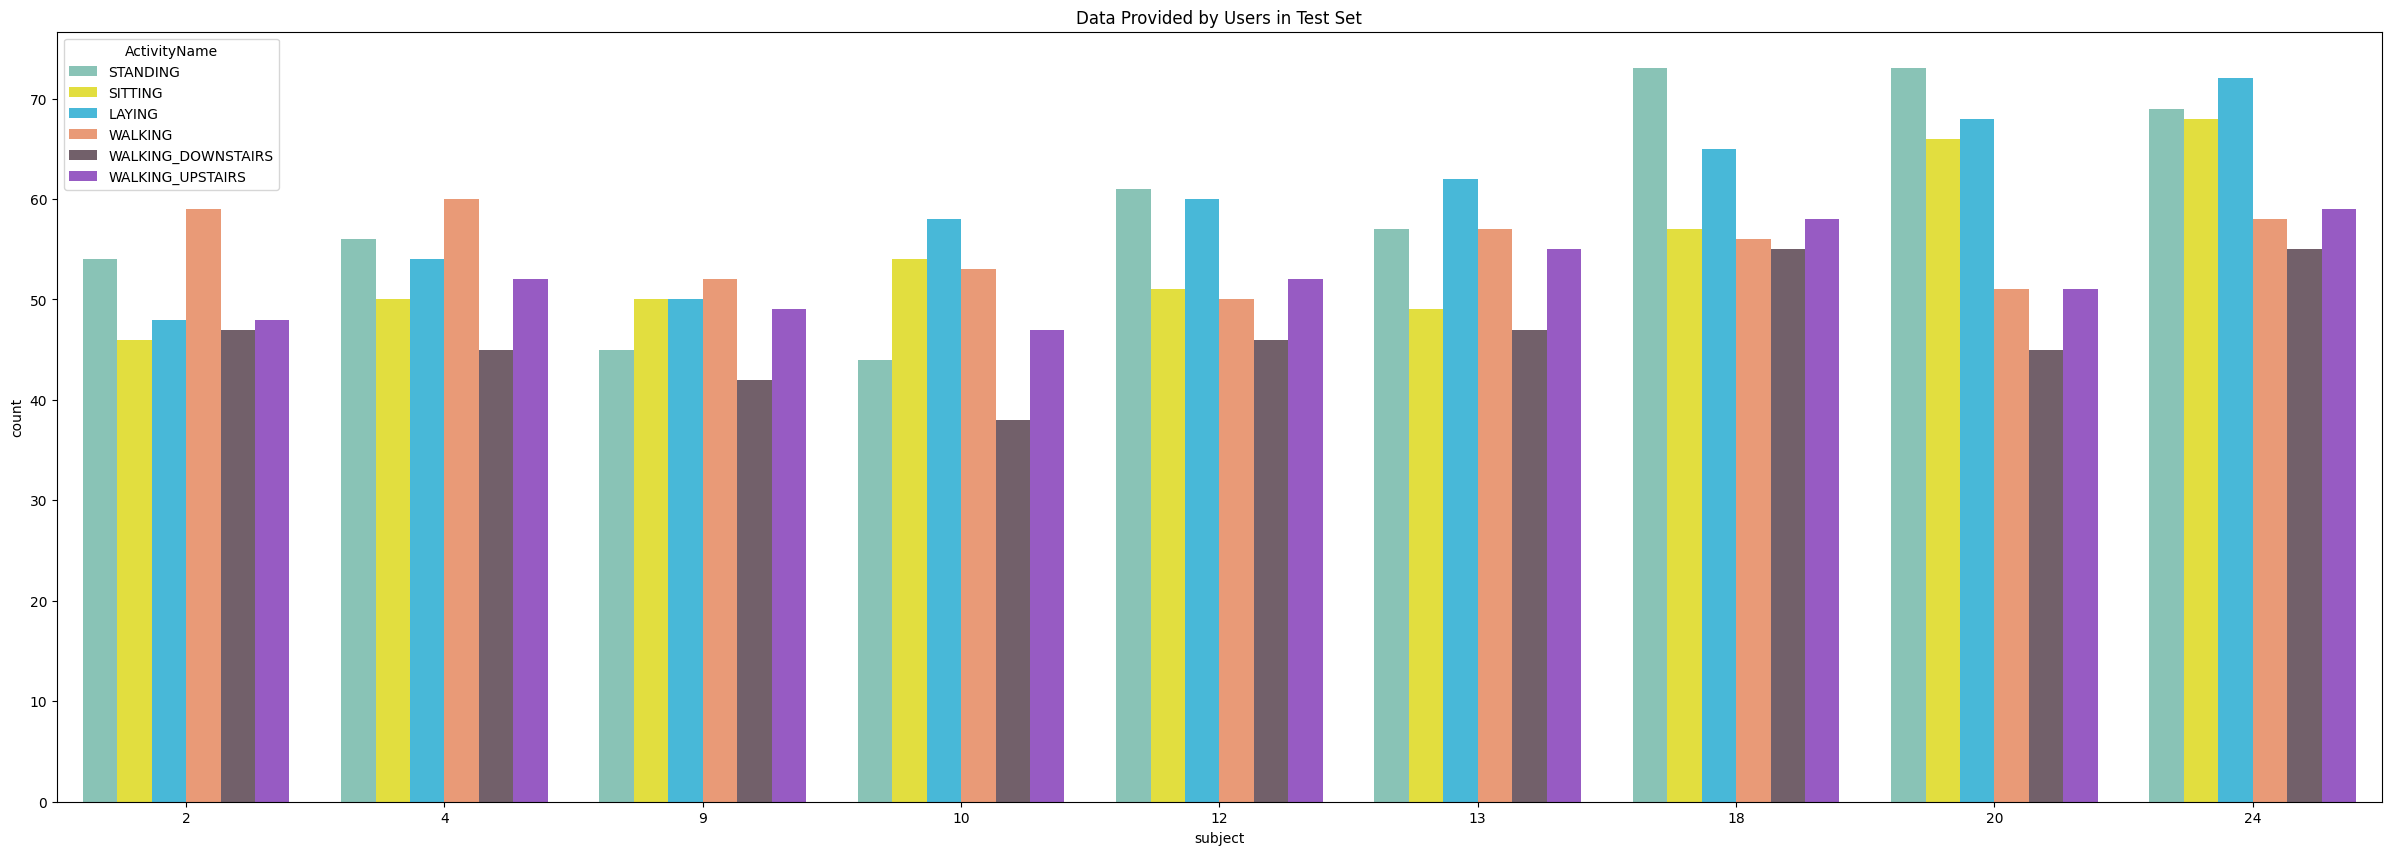

In [10]:
# Setting the figure size
pyplot.figure(figsize=(30, 10))

# Creating a count plot
sns.countplot(x='subject', hue='ActivityName', palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"], data=test)

# Adding a title to the plot
pyplot.title('Data Provided by Users in Test Set')

# Displaying the plot
pyplot.show()

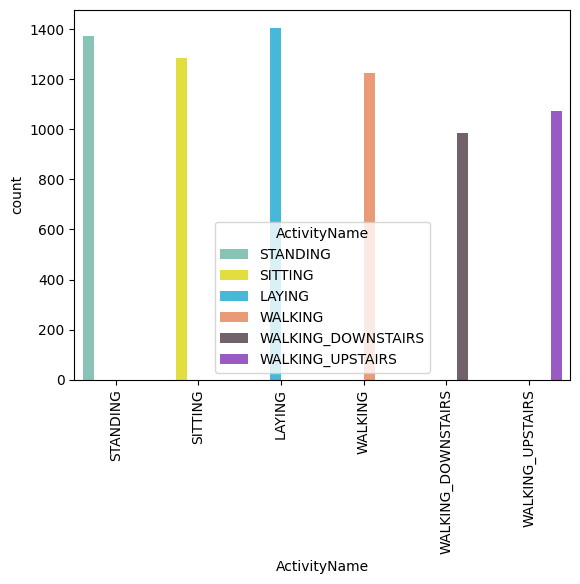

In [11]:
sns.countplot(x="ActivityName",
               hue='ActivityName',
               palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"],
               data=train)
pyplot.xticks(rotation=90)
pyplot.show()

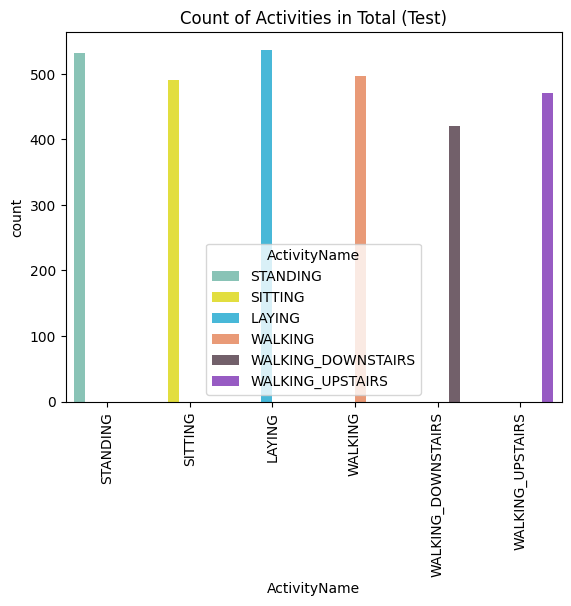

In [12]:
pyplot.title('Count of Activities in Total (Test)')
sns.countplot(x="ActivityName",
               hue='ActivityName',
               palette=["#7fcdbb", "#fdf824", "#30c6f0", "#fc9264", "#755d6b", "#9a4ad4"],
               data=test)
pyplot.xticks(rotation=90)
pyplot.show()

**CNN-LSTM Model**

In [13]:
def file_load(filepath):
    # Load the file into a DataFrame using read_csv
    df = read_csv(filepath, header=None, delim_whitespace=True)

    # Return the values of the DataFrame
    return df.values

In [14]:
def train_test_append(filenames, append_before=''):
    # Initialize an empty list to store the loaded data
    datalist = list()

    # Iterate through each filename in the provided list
    for name in filenames:
        # Load the file using the file_load function
        data = file_load(append_before + name)

        # Append the loaded data to the list
        datalist.append(data)

    # Stack the data along the third axis (axis=2)
    datalist = dstack(datalist)

    # Return the stacked data
    return datalist

In [15]:

def inertial_signals_load(group, append_before=''):
    # Construct the file path for the Inertial Signals directory
    filepath = append_before + group + '/Inertial Signals/'

    # List of filenames for different signals
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']

    # Load the inertial signals data using the train_test_append function
    X = train_test_append(filenames, filepath)

    # Load the corresponding activity labels (y) using the file_load function
    y = file_load(append_before + group + '/y_'+group+'.txt')

    # Return the loaded inertial signals data (X) and activity labels (y)
    return X, y

In [16]:
def load_dataset(append_before=''):
    # Load training set inertial signals and labels
    trainX, trainy = inertial_signals_load('train', append_before + 'UCI HAR Dataset/')

    # Load testing set inertial signals and labels
    testX, testy = inertial_signals_load('test', append_before + 'UCI HAR Dataset/')

    # Adjust labels to start from 0
    trainy = trainy - 1
    testy = testy - 1

    # Convert labels to one-hot encoded format
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)

    # Print shapes of the loaded data
    print("X Train shape:", trainX.shape)
    print("Y Train Shape:", trainy.shape)
    print("X Test  shape:", testX.shape)
    print("Y Test  shape:", testy.shape)

    # Return the loaded data and labels
    return trainX, trainy, testX, testy


In [17]:
trainX, trainy, testX, testy = load_dataset(Directory)

# Concatenate along axis 0 (assuming you want to concatenate along the first dimension)
X_combined = np.concatenate((trainX, testX), axis=0)
Y_combined = np.concatenate((trainy, testy), axis=0)

# Print the shapes of the concatenated arrays
print("\nX Combined shape:", X_combined.shape)
print("Y Combined shape:", Y_combined.shape)


test_size = 0.1
# Calculate the number of samples for the test set
test_samples = int(len(X_combined) * test_size)

# Perform the initial time-based train-test split
trainX, testX = X_combined[:-test_samples], X_combined[-test_samples:]
trainy, testy = Y_combined[:-test_samples], Y_combined[-test_samples:]

# OW/NOW => comment for OW
# trainX = np.take(trainX, indices=np.arange(64), axis=1)
# testX = np.take(testX, indices=np.arange(64), axis=1)

# Print the shapes of the reshaped data
print("\nX Train  shape and type:"  , trainX.shape,type(trainX))
print("X Test   shape and type:"    , testX.shape ,type(testX))
print("Y Test   shape and type:"    , trainy.shape,type(trainy))
print("Y Test   shape and type:"    , testy.shape ,type(testy))

X Train shape: (7352, 128, 9)
Y Train Shape: (7352, 6)
X Test  shape: (2947, 128, 9)
Y Test  shape: (2947, 6)

X Combined shape: (10299, 128, 9)
Y Combined shape: (10299, 6)

X Train  shape and type: (9270, 128, 9) <class 'numpy.ndarray'>
X Test   shape and type: (1029, 128, 9) <class 'numpy.ndarray'>
Y Test   shape and type: (9270, 6) <class 'numpy.ndarray'>
Y Test   shape and type: (1029, 6) <class 'numpy.ndarray'>


In [18]:
# Set parameters for the model
verbose, epochs, batch_size = 1, 182, 64
n_timesteps = trainX.shape[1]
n_features = trainX.shape[2]
n_outputs = trainy.shape[1]
n_steps = 1
n_length = 128

# Reshape the data for the CNN-LSTM model
trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))

# Print the shapes of the reshaped data
print("Train  shape:", trainX.shape)
print("Test   shape:", testX.shape)


Train  shape: (9270, 1, 128, 9)
Test   shape: (1029, 1, 128, 9)


In [19]:
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
tscv = TimeSeriesSplit(n_splits=n_splits)

In [20]:
for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f"validation fold {fold}/{n_splits}", min(val_index),max(val_index), val_index.shape)

for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f"Train fold {fold}/{n_splits}", min(train_index),max(train_index), train_index.shape)

validation fold 0/10 850 1691 (842,)
validation fold 1/10 1692 2533 (842,)
validation fold 2/10 2534 3375 (842,)
validation fold 3/10 3376 4217 (842,)
validation fold 4/10 4218 5059 (842,)
validation fold 5/10 5060 5901 (842,)
validation fold 6/10 5902 6743 (842,)
validation fold 7/10 6744 7585 (842,)
validation fold 8/10 7586 8427 (842,)
validation fold 9/10 8428 9269 (842,)
Train fold 0/10 0 849 (850,)
Train fold 1/10 0 1691 (1692,)
Train fold 2/10 0 2533 (2534,)
Train fold 3/10 0 3375 (3376,)
Train fold 4/10 0 4217 (4218,)
Train fold 5/10 0 5059 (5060,)
Train fold 6/10 0 5901 (5902,)
Train fold 7/10 0 6743 (6744,)
Train fold 8/10 0 7585 (7586,)
Train fold 9/10 0 8427 (8428,)



Fold 1/10:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 126, 507)    14196     
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 63, 507)     0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 63, 507)     0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 61, 111)     168942    
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, None, 30

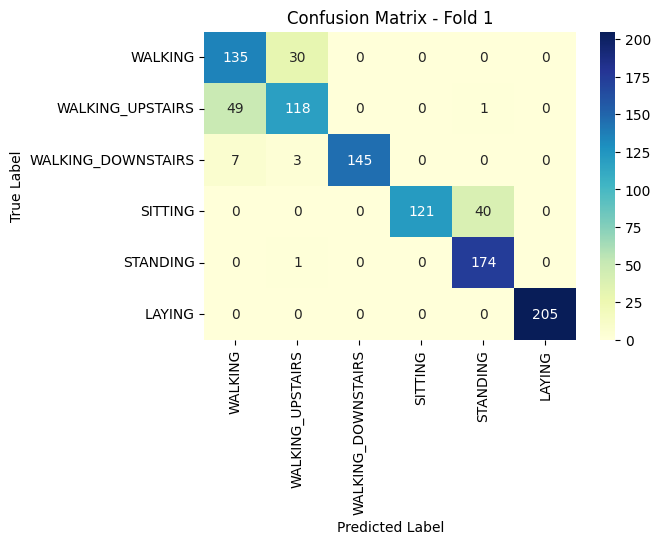

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       165
           1       0.78      0.70      0.74       168
           2       1.00      0.94      0.97       155
           3       1.00      0.75      0.86       161
           4       0.81      0.99      0.89       175
           5       1.00      1.00      1.00       205

    accuracy                           0.87      1029
   macro avg       0.88      0.87      0.87      1029
weighted avg       0.88      0.87      0.87      1029


Fold 2/10:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_14 (TimeD  (None, None, 63, 507)     0         
 istributed)               

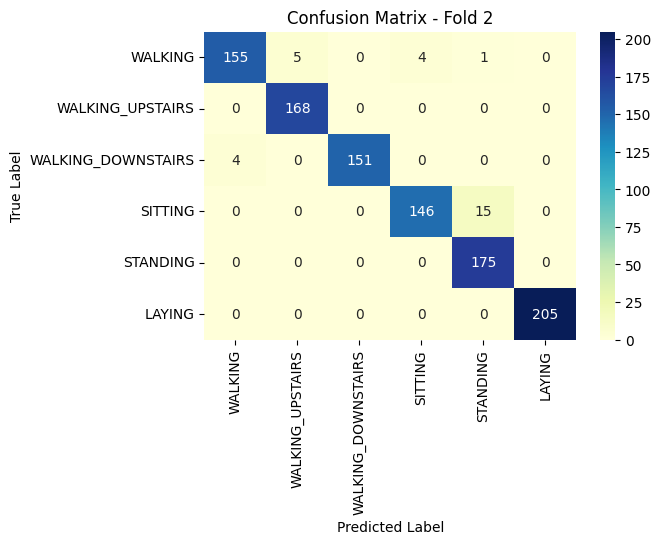

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       165
           1       0.97      1.00      0.99       168
           2       1.00      0.97      0.99       155
           3       0.97      0.91      0.94       161
           4       0.92      1.00      0.96       175
           5       1.00      1.00      1.00       205

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029


Fold 3/10:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_26 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_27 (TimeD  (None, None, 63, 507)     0         
 istributed)               

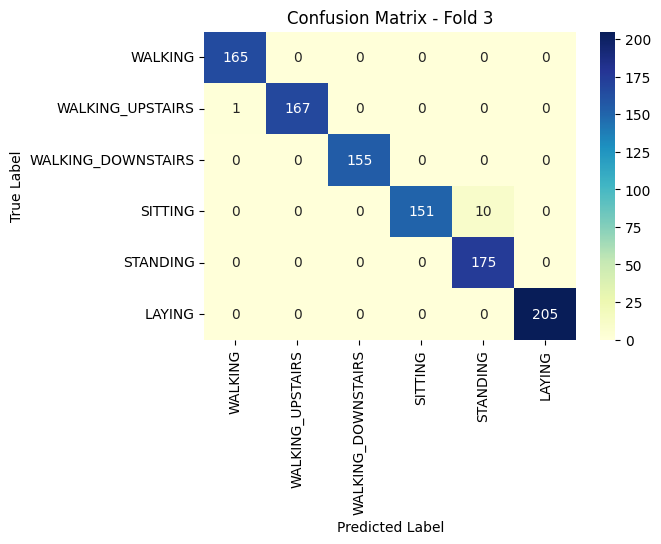

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       165
           1       1.00      0.99      1.00       168
           2       1.00      1.00      1.00       155
           3       1.00      0.94      0.97       161
           4       0.95      1.00      0.97       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 4/10:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_39 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_40 (TimeD  (None, None, 63, 507)     0         
 istributed)               

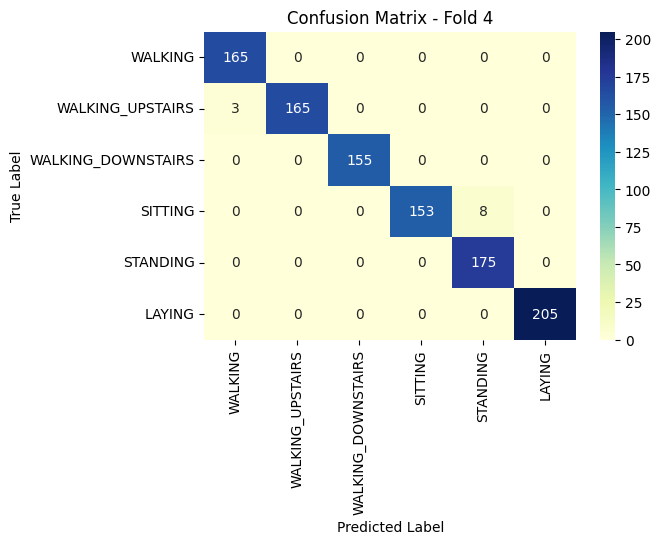

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       165
           1       1.00      0.98      0.99       168
           2       1.00      1.00      1.00       155
           3       1.00      0.95      0.97       161
           4       0.96      1.00      0.98       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 5/10:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_52 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_53 (TimeD  (None, None, 63, 507)     0         
 istributed)               

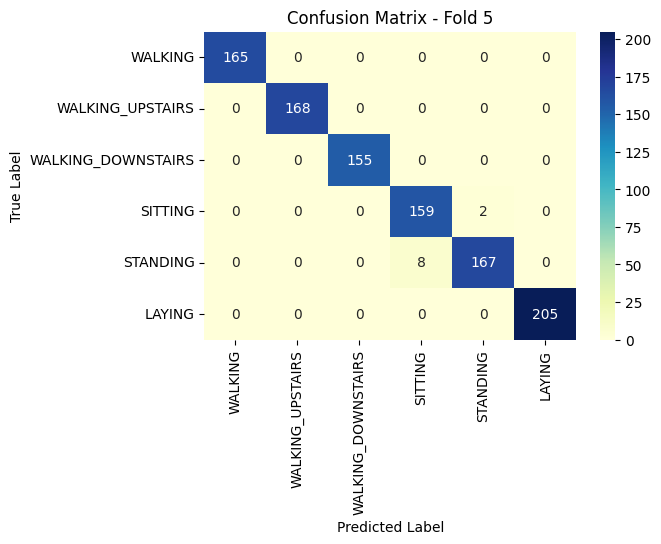

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00       155
           3       0.95      0.99      0.97       161
           4       0.99      0.95      0.97       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 6/10:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_65 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_66 (TimeD  (None, None, 63, 507)     0         
 istributed)               

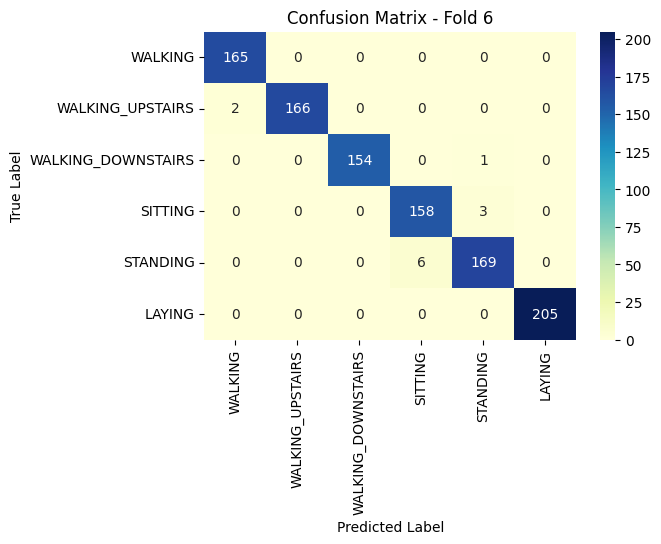

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       165
           1       1.00      0.99      0.99       168
           2       1.00      0.99      1.00       155
           3       0.96      0.98      0.97       161
           4       0.98      0.97      0.97       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 7/10:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_78 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_79 (TimeD  (None, None, 63, 507)     0         
 istributed)               

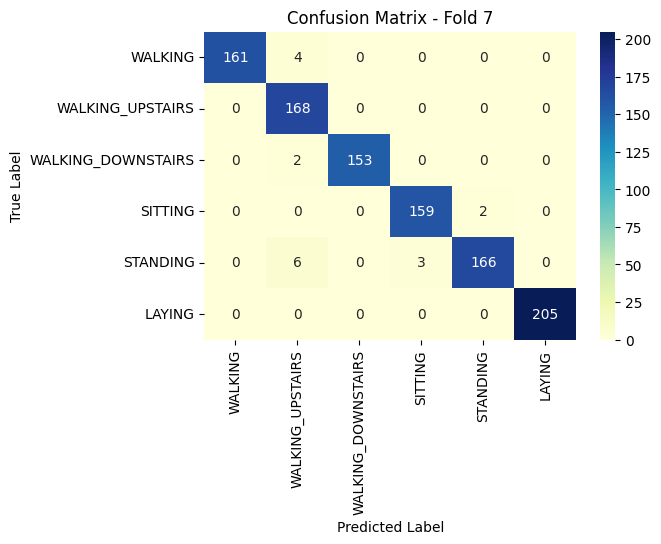

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       165
           1       0.93      1.00      0.97       168
           2       1.00      0.99      0.99       155
           3       0.98      0.99      0.98       161
           4       0.99      0.95      0.97       175
           5       1.00      1.00      1.00       205

    accuracy                           0.98      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.98      0.98      0.98      1029


Fold 8/10:
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_91 (TimeD  (None, None, 126, 507)    14196     
 istributed)                                                     
                                                                 
 time_distributed_92 (TimeD  (None, None, 63, 507)     0         
 istributed)               

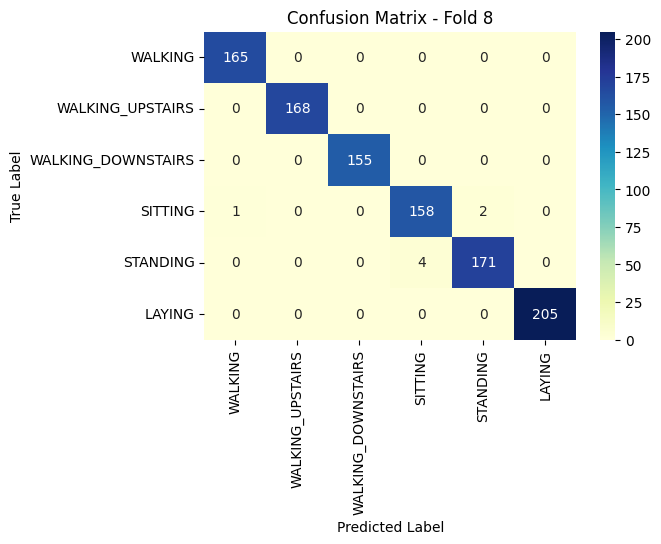

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       165
           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00       155
           3       0.98      0.98      0.98       161
           4       0.99      0.98      0.98       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 9/10:
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_104 (Time  (None, None, 126, 507)    14196     
 Distributed)                                                    
                                                                 
 time_distributed_105 (Time  (None, None, 63, 507)     0         
 Distributed)              

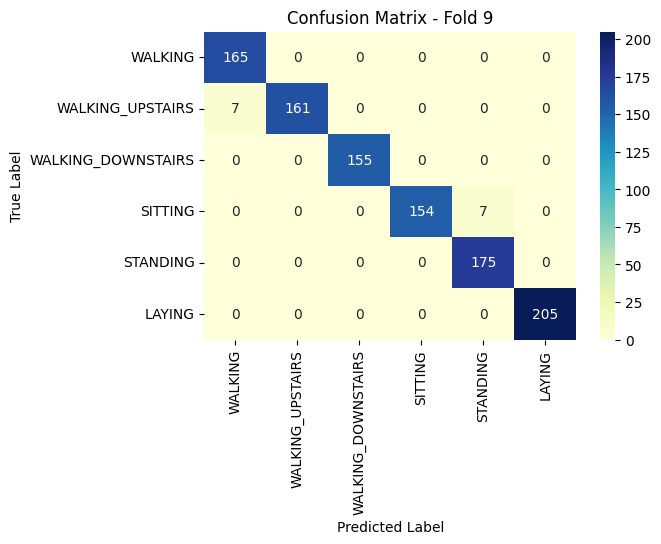

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       165
           1       1.00      0.96      0.98       168
           2       1.00      1.00      1.00       155
           3       1.00      0.96      0.98       161
           4       0.96      1.00      0.98       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029


Fold 10/10:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_117 (Time  (None, None, 126, 507)    14196     
 Distributed)                                                    
                                                                 
 time_distributed_118 (Time  (None, None, 63, 507)     0         
 Distributed)             

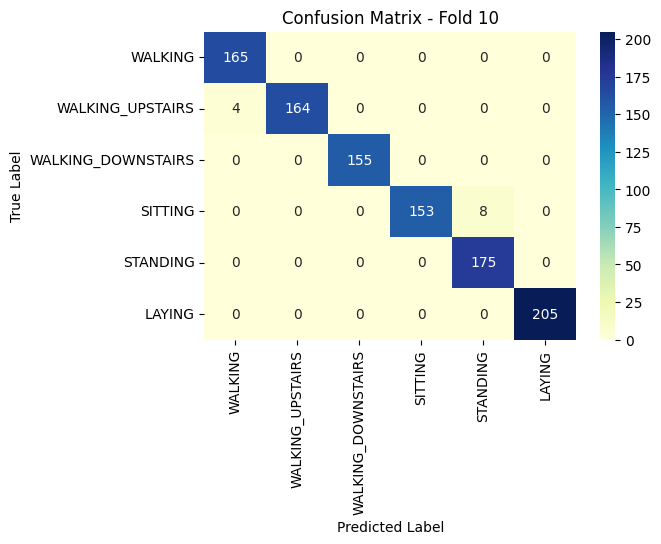

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       165
           1       1.00      0.98      0.99       168
           2       1.00      1.00      1.00       155
           3       1.00      0.95      0.97       161
           4       0.96      1.00      0.98       175
           5       1.00      1.00      1.00       205

    accuracy                           0.99      1029
   macro avg       0.99      0.99      0.99      1029
weighted avg       0.99      0.99      0.99      1029



In [21]:
# Create an empty list to store Accuracies for each fold
fold_accuracies=[]

# Create an empty list to store confusion matrices for each fold
fold_confusion_matrices = []
#Labels for Confusion marix
LABELS = ['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

for fold, (train_index, val_index) in enumerate(tscv.split(trainX)):
    print(f'\nFold {fold + 1}/{n_splits}:')

    # Split the data into training and validation sets for this fold (valid size = 10% of trian)
    X_train, X_val = trainX[train_index], trainX[val_index]
    y_train, y_val = trainy[train_index], trainy[val_index]

    #############################################################################################
    model = Sequential()

    # Convolutional layer 1
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=507, activation='relu'), input_shape=(None, n_length, n_features)))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 2
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=111, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 3
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=468, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Convolutional layer 4
    model.add(TimeDistributed(Conv1D(kernel_size=3, filters=509, activation='relu')))

    # MaxPool and DropOut
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Dropout(0.00952)))

    # Flatten layer with time distribution
    model.add(TimeDistributed(Flatten()))

    # LSTM layer
    model.add(LSTM(127))

    model.add(Dropout(0.27907))

    # Dense (fully connected) layer with ReLU activation
    model.add(Dense(772, activation='relu'))

    # Output layer with softmax activation (for multi-class classification)
    model.add(Dense(n_outputs, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Display the model summary
    model.summary()

    #############################################################################################

    # Train the model on the current fold
    history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=verbose)
    # history=model.fit(X_train, y_train, validation_data=(testX, testy), epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(testX, testy, verbose=verbose)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')
    # Append the accuracy to the list
    fold_accuracies.append(test_acc)

    # Make predictions on the test set
    y_pred = model.predict(testX)
    max_y_pred = np.argmax(y_pred, axis=1)
    max_y_test = np.argmax(testy, axis=1)

    # Calculate confusion matrix for this fold
    fold_confusion_matrix = sklearn_metrics.confusion_matrix(max_y_test, max_y_pred)

    # Append the confusion matrix to the list
    fold_confusion_matrices.append(fold_confusion_matrix)

    # Visualize the confusion matrix for this fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(fold_confusion_matrix, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - Fold {fold + 1}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    clr = sklearn_metrics.classification_report(max_y_test, max_y_pred)
    print(clr)

In [23]:
# Calculate and print the average accuracy

for i in range(n_splits):
    print(f'fold {i+1}/{n_splits} Accuracy = {fold_accuracies[i] * 1:.4f}')

print(f'\nHighst Accuracy: {np.max(fold_accuracies) * 1:.4f}')
print(f'Lowest Accuracy: {np.min(fold_accuracies) * 1:.4f}')
print(f'\nFinal Average Accuracy: {np.mean(fold_accuracies) * 1:.4f} ± {np.std(fold_accuracies) * 1:.4f}')

fold 1/10 Accuracy = 0.8727
fold 2/10 Accuracy = 0.9718
fold 3/10 Accuracy = 0.9893
fold 4/10 Accuracy = 0.9893
fold 5/10 Accuracy = 0.9903
fold 6/10 Accuracy = 0.9883
fold 7/10 Accuracy = 0.9835
fold 8/10 Accuracy = 0.9932
fold 9/10 Accuracy = 0.9864
fold 10/10 Accuracy = 0.9883

Highst Accuracy: 0.9932
Lowest Accuracy: 0.8727

Final Average Accuracy: 0.9753 ± 0.0347
